<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/aapl_DeepSARSA_training_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Protocol Buffer Fix (for TensorFlow)
!pip install --upgrade protobuf
!pip install protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 6.30.2 which is incompatible.
google-cloud-aiplatform 1.84.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.2 which is incompatible.
tensorflow 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.30.2 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 6.30.2 which is incompatib

In [2]:
#Install TensorFlow (latest stable GPU-compatible version)
!pip install tensorflow

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Reinstall RAPIDS dependencies if needed (optional reset)
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [4]:
import torch
import cudf
import cuml
import dask
import pandas as pd
import numpy as np
import scipy
import lightgbm as lgb
import gymnasium as gym
import stable_baselines3

#=========================
#Version Checks
#=========================
print(" Library Versions")
print("--------------------")
print(" PyTorch:", torch.__version__)
print(" CUDA:", torch.version.cuda)
print(" cuDF:", cudf.__version__)
print(" cuML:", cuml.__version__)
print(" Dask:", dask.__version__)
print(" Pandas:", pd.__version__)
print(" NumPy:", np.__version__)
print(" SciPy:", scipy.__version__)
print(" LightGBM:", lgb.__version__)
print(" Gymnasium:", gym.__version__)
print(" Stable Baselines3:", stable_baselines3.__version__)

#=========================
#GPU Check (Torch + NVIDIA)
#=========================
print("\n GPU Availability")
print("--------------------")
print(" PyTorch GPU Available:", torch.cuda.is_available())
print(" GPU Count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print(" GPU Name:", torch.cuda.get_device_name(0))


 Library Versions
--------------------
 PyTorch: 2.6.0+cu124
 CUDA: 12.4
 cuDF: 25.02.01
 cuML: 25.02.01
 Dask: 2024.12.1
 Pandas: 2.2.2
 NumPy: 2.0.2
 SciPy: 1.14.1
 LightGBM: 4.5.0
 Gymnasium: 1.1.1
 Stable Baselines3: 2.6.0

 GPU Availability
--------------------
 PyTorch GPU Available: True
 GPU Count: 1
 GPU Name: Tesla T4


In [5]:
#Core Libraries
import gc
import json
import os
import pickle
import sys
import time
from collections import defaultdict
from datetime import datetime

#Data Science Essentials
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd

#Machine Learning & Data Processing
import joblib
import lightgbm as lgb
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
)
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import MinMaxScaler

#Deep Learning
import tensorflow as tf
from tensorflow.keras import mixed_precision
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential, load_model

#RAPIDS Libraries (cuDF & cuML for GPU acceleration)
import cupy as cp

#Reinforcement Learning (Stable Baselines3)
import stable_baselines3
from stable_baselines3 import A2C, DDPG, DQN, PPO, SAC, TD3
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

#Gym & Trading Environments
import gym
import gymnasium as gym
import gym_anytrading
from gym.spaces import Box
from gymnasium.spaces import Box as GymBox, Discrete
from gymnasium.wrappers import TimeLimit
from gym_anytrading.envs import StocksEnv

#Financial & Visualization Libraries
import yfinance as yf
import IPython.display as display


In [6]:
#Set CUDA Paths (Ensuring GPU Utilization)
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

In [7]:
!nvidia-smi

Sun Mar 30 14:56:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
#================================
#Utility Functions
#================================

def fix_dataframe_index(df):
    """
    Flattens MultiIndex columns and removes duplicated columns.
    """
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    return df.loc[:, ~df.columns.duplicated()]


def calculate_rsi(series, period=14):
    """
    Calculates the Relative Strength Index (RSI) for a given price series.
    """
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / (loss + 1e-6)  #Avoid division by zero
    return 100 - (100 / (1 + rs))


def compute_technical_indicators(df):
    """
    Applies technical indicators including Bollinger Bands, Stochastic Oscillator,
    volatility, momentum, trend, and volume indicators.
    """
    df = df.copy()
    df = fix_dataframe_index(df)

    #Bollinger Bands
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['STD_20'] = df['Close'].rolling(window=20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']

    #Stochastic Oscillator
    df['Lowest_Low'] = df['Low'].rolling(window=14).min()
    df['Highest_High'] = df['High'].rolling(window=14).max()
    denominator = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denominator) * 100

    #Volatility and Momentum
    df['volatility'] = df['Close'].pct_change().rolling(20).std()
    df['ROC'] = df['Close'].pct_change(periods=10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()

    #Commodity Channel Index (CCI)
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (
        0.015 * typical_price.rolling(20).std()
    )

    #Price Rate of Change (PROC)
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100

    #Rolling and Expanding Means
    df['Rolling_Mean_50'] = df['Close'].rolling(window=50).mean()
    df['Expanding_Mean'] = df['Close'].expanding(min_periods=1).mean()

    df.dropna(inplace=True)
    return df


def generate_trade_labels(df, lookahead=10, threshold_factor=2):
    """
    Generates binary and dynamic trade labels based on future returns
    and volatility-adjusted thresholds.
    """
    df = df.copy()
    df = fix_dataframe_index(df)

    if 'Close' not in df.columns:
        raise KeyError(" 'Close' column is missing. Cannot generate trade labels.")

    #Calculate future price change for labeling
    df['Future_Close'] = df['Close'].shift(-lookahead)
    df['Price_Change'] = (df['Future_Close'] - df['Close']) / df['Close']

    #Binary trade labels (Target = 1 for gains > 3%, otherwise 0)
    df['Target'] = np.where(df['Price_Change'] > 0.03, 1, 0)

    #Dynamic trade labels with volatility-adjusted thresholds
    buy_threshold = df['volatility'] * threshold_factor
    sell_threshold = -df['volatility'] * threshold_factor
    df['Dynamic_Label'] = np.where(
        df['Price_Change'] > buy_threshold, 1,
        np.where(df['Price_Change'] < sell_threshold, -1, 0)
    )

    df.dropna(inplace=True)
    return df


def drop_low_importance_features(df, feature_importance_df, threshold=1.0):
    """
    Drops low-importance features based on a given threshold.
    """
    low_importance_features = feature_importance_df[
        feature_importance_df['importance'] < threshold
    ]['feature'].tolist()

    if low_importance_features:
        df.drop(columns=low_importance_features, inplace=True)
        print(f" Dropped low-importance features: {low_importance_features}")
    else:
        print(" No low-importance features found to drop.")

    return df


In [13]:
#Enable CUDA Benchmarking for Faster GPU Computation
torch.backends.cudnn.benchmark = True
def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker} stock data...")
            df_live = yf.download(ticker, period=period, interval=interval)
            if not df_live.empty:
                print(" Successfully downloaded stock data!")
                df_live.reset_index(inplace=True)
                return df_live
            raise ValueError("Downloaded data is empty. Retrying...")
        except Exception as e:
            print(f" Error: {e}. Retrying in {attempt * 5} seconds...")
            time.sleep(attempt * 5)
    print(" Failed to download stock data after multiple attempts.")
    return None

df_live = download_stock_data("aapl")
if df_live is None:
    print(" Using previously saved dataset instead.")
    file_path = '/content/drive/My Drive/aaplfeature_engineered_dataset.csv'
    df_live = pd.read_csv(file_path)

df = df_live.copy()

Attempt 1: Downloading aapl stock data...


[*********************100%***********************]  1 of 1 completed

 Successfully downloaded stock data!


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt
import time
import json
import pandas as pd
import gymnasium as gym
from gymnasium.spaces import Discrete, Box
import yfinance as yf


#Define Q-Network
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(QNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.model(x)


#Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" Using device: {device}")
if torch.cuda.is_available():
    print(f"🔧 GPU: {torch.cuda.get_device_name(0)}")

 Using device: cuda
 GPU: Tesla T4


In [15]:
#Define Deep SARSA Agent
class DeepSARSAAgent:
    def __init__(self, env, alpha=5e-4, gamma=0.98, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.05,
                 buffer_size=10000, batch_size=64, target_update_freq=10):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.batch_size = batch_size
        self.target_update_freq = target_update_freq

        obs_shape = env.observation_space.shape
        self.state_dim = np.prod(obs_shape)
        self.action_dim = env.action_space.n

        self.q_net = QNetwork(self.state_dim, self.action_dim).to(device)
        self.target_q_net = QNetwork(self.state_dim, self.action_dim).to(device)
        self.target_q_net.load_state_dict(self.q_net.state_dict())
        self.target_q_net.eval()

        self.optimizer = optim.Adam(self.q_net.parameters(), lr=self.alpha)
        self.criterion = nn.MSELoss()
        self.replay_buffer = deque(maxlen=buffer_size)

        print(" Model device:", next(self.q_net.parameters()).device)

    def choose_action(self, state):
        state_tensor = torch.tensor(state, dtype=torch.float32, device=device)
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        with torch.no_grad():
            q_values = self.q_net(state_tensor)
        return torch.argmax(q_values).item()

    def train(self, num_episodes=200, max_steps=500, plot_rewards=True):
        rewards_per_episode = []
        all_portfolio_values = []  #Track portfolio values across episodes
        final_portfolio_values = []  #Track final portfolio value per episode
        profit_loss_per_episode = []  #Store profit/loss for analysis
        successful_trades = 0
        total_trades = 0

        for episode in range(num_episodes):
            state, _ = self.env.reset()
            state = state.flatten()
            state_tensor = torch.tensor(state, dtype=torch.float32, device=device)
            action = self.choose_action(state)

            total_reward = 0
            portfolio_values = []  #Store portfolio values for each episode
            steps_since_last_sell = 0

            for step in range(max_steps):
                next_state, reward, done, _, info = self.env.step(action)
                next_state = next_state.flatten()
                next_state_tensor = torch.tensor(next_state, dtype=torch.float32, device=device)
                next_action = self.choose_action(next_state)

                #Track Portfolio Value at Each Step
                portfolio_values.append(info["portfolio_value"])

                #Count Trades
                if action == 0 and self.env.shares_held > 0:  #SELL
                    total_trades += 1
                    if reward > 0:
                        successful_trades += 1

                #Improved Reward Shaping
                reward = reward * 0.01
                if action == 2:  #BUY
                    reward += 0.4
                elif action == 0:  #SELL
                    reward += 1.0
                    if reward < 0:
                        reward -= 0.2
                    steps_since_last_sell = 0
                elif action == 1:  #HOLD
                    reward += 0.05
                    steps_since_last_sell += 1
                    if steps_since_last_sell > 50:
                        reward -= 0.2  #Penalize long holding

                reward_tensor = torch.tensor([reward], dtype=torch.float32, device=device)
                self.replay_buffer.append((state_tensor, action, reward_tensor, next_state_tensor, next_action))

                state_tensor = next_state_tensor
                action = next_action
                total_reward += reward

                if done:
                    break

            #Store Final Portfolio Value and Profit/Loss
            final_portfolio_value = portfolio_values[-1]
            final_portfolio_values.append(final_portfolio_value)
            profit_loss_per_episode.append(final_portfolio_value - self.env.initial_balance)

            #Save Portfolio Values to CSV
            np.savetxt(f"DeepSARSA_portfolio_values_episode_{episode}.csv", portfolio_values, delimiter=",")

            #Replay Buffer Learning
            if len(self.replay_buffer) >= self.batch_size:
                for _ in range(5):
                    batch = random.sample(self.replay_buffer, self.batch_size)
                    losses = []
                    for s, a, r, s_next, a_next in batch:
                        q_val = self.q_net(s)[a]
                        with torch.no_grad():
                            target_val = r + self.gamma * self.target_q_net(s_next)[a_next]
                        loss = self.criterion(q_val.unsqueeze(0), target_val)
                        losses.append(loss)

                    self.optimizer.zero_grad()
                    torch.stack(losses).mean().backward()
                    self.optimizer.step()

            self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)
            if episode % self.target_update_freq == 0:
                self.target_q_net.load_state_dict(self.q_net.state_dict())

            rewards_per_episode.append(total_reward)
            if episode % 25 == 0:
                print(f" Episode {episode}, Reward: {total_reward:.2f}, Epsilon: {self.epsilon:.4f}")

        #Save Final Portfolio Values and Metrics
        results_dict = {
            "final_portfolio_values": final_portfolio_values,
            "profit_loss_per_episode": profit_loss_per_episode,
            "success_rate": successful_trades / total_trades if total_trades > 0 else 0,
            "avg_final_portfolio_value": np.mean(final_portfolio_values),
            "avg_profit_loss": np.mean(profit_loss_per_episode),
        }

        with open("DeepSARSA_training_results.json", "w") as f:
            json.dump(results_dict, f, indent=2)

        print(" Portfolio values and metrics saved for analysis.")
        print("\n Deep SARSA Training Complete!")

        if plot_rewards:
            plt.plot(rewards_per_episode)
            plt.xlabel("Episode")
            plt.ylabel("Total Reward")
            plt.title("Deep SARSA Training Rewards")
            plt.grid()
            plt.show()



In [16]:
#Define DiscreteTradingEnv for Deep SARSA
class DiscreteTradingEnv(gym.Env):
    def __init__(self, df, frame_bound=(10, 100), window_size=10):
        super(DiscreteTradingEnv, self).__init__()
        self.df = df.reset_index(drop=True)
        self.frame_bound = frame_bound
        self.window_size = window_size
        self.current_step = self.frame_bound[0]

        self.initial_balance = 100000
        self.portfolio_value = self.initial_balance
        self.shares_held = 0
        self.last_trade_price = 0

        self.action_space = Discrete(3)  #0 = SELL, 1 = HOLD, 2 = BUY
        self.observation_space = Box(low=-np.inf, high=np.inf, shape=(window_size + 2,), dtype=np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step = self.frame_bound[0]
        self.portfolio_value = self.initial_balance
        self.shares_held = 0
        self.last_trade_price = 0
        return self._next_observation().flatten(), {}

    def _next_observation(self):
        stock_prices = np.array(self.df['Close'].iloc[self.current_step - self.window_size:self.current_step],
                                dtype=np.float32).flatten()
        if len(stock_prices) < self.window_size:
            stock_prices = np.pad(stock_prices, (self.window_size - len(stock_prices), 0), mode='edge')

        portfolio_info = np.array([self.portfolio_value, self.shares_held], dtype=np.float32).flatten()
        obs = np.concatenate((portfolio_info, stock_prices))
        return obs

    def step(self, action):
        self.current_step += 1
        if self.current_step >= len(self.df):
            return self._next_observation().flatten(), 0, True, False, {"portfolio_value": self.portfolio_value}

        price = float(self.df['Close'].iloc[self.current_step])
        reward = 0

        if action == 2 and self.portfolio_value >= price:  #BUY
            self.shares_held += 1
            self.portfolio_value -= price
            self.last_trade_price = price
        elif action == 0 and self.shares_held > 0:  #SELL
            self.portfolio_value += price
            self.shares_held -= 1
            reward = price - self.last_trade_price

        self.portfolio_value += self.shares_held * price
        info = {"portfolio_value": self.portfolio_value, "shares_held": self.shares_held, "price": price}
        return self._next_observation().flatten(), reward, False, False, info

    def render(self):
        pass


 Model device: cuda:0


<ipython-input-16-8c4659a4beff>:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(self.df['Close'].iloc[self.current_step])


 Episode 0, Reward: 225.51, Epsilon: 0.9950
 Episode 25, Reward: 212.40, Epsilon: 0.8778
 Episode 50, Reward: 236.69, Epsilon: 0.7744
 Episode 75, Reward: 226.82, Epsilon: 0.6832
 Episode 100, Reward: 221.89, Epsilon: 0.6027
 Episode 125, Reward: 363.47, Epsilon: 0.5318
 Episode 150, Reward: 377.92, Epsilon: 0.4691
 Episode 175, Reward: 381.96, Epsilon: 0.4139
 Portfolio values and metrics saved for analysis.

 Deep SARSA Training Complete!


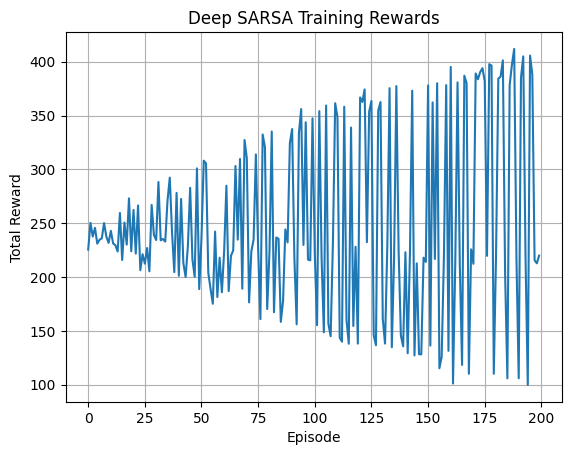

⏱️ Training complete in 199.35 seconds


In [17]:

#Create environment and instantiate Deep SARSA Agent
env_discrete_sarsa = DiscreteTradingEnv(df, frame_bound=(10, len(df)), window_size=10)

#Instantiate and Train Deep SARSA Agent
sarsa_agent = DeepSARSAAgent(env_discrete_sarsa)

#Train for 200 episodes
start_time = time.time()
sarsa_agent.train(num_episodes=200)
print(f"⏱️ Training complete in {time.time() - start_time:.2f} seconds")


In [18]:
def evaluate_sarsa(agent, env, num_episodes=10, max_steps=500):
    """
    Evaluate the trained Deep SARSA agent on the environment.

    Args:
    - agent: Trained Deep SARSA agent
    - env: Trading environment
    - num_episodes: Number of episodes for evaluation
    - max_steps: Max steps per episode

    Returns:
    - avg_final_value: Average portfolio value at the end of evaluation
    - avg_reward: Average total reward per episode
    - avg_profit_loss: Average profit/loss at the end of evaluation
    """
    portfolio_values = []
    rewards_per_episode = []
    profit_loss = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        state = state.flatten()
        state_tensor = torch.tensor(state, dtype=torch.float32, device=device)
        action = agent.choose_action(state)

        total_reward = 0
        portfolio_value = env.portfolio_value

        for step in range(max_steps):
            next_state, reward, done, _, info = env.step(action)
            next_state = next_state.flatten()
            next_state_tensor = torch.tensor(next_state, dtype=torch.float32, device=device)
            next_action = agent.choose_action(next_state)

            #Track rewards and portfolio values
            total_reward += reward
            portfolio_value = info["portfolio_value"]

            state_tensor = next_state_tensor
            action = next_action

            if done:
                break

        portfolio_values.append(portfolio_value)
        rewards_per_episode.append(total_reward)
        profit_loss.append(portfolio_value - env.initial_balance)

        print(f" Eval Episode {episode + 1}: Final Value = ${portfolio_value:.2f}, "
              f"Reward = {total_reward:.2f}, P/L = ${portfolio_value - env.initial_balance:.2f}")

    avg_final_value = np.mean(portfolio_values)
    avg_reward = np.mean(rewards_per_episode)
    avg_profit_loss = np.mean(profit_loss)

    print(f"\n Average Final Portfolio Value: ${avg_final_value:.2f}")
    print(f" Average Total Reward: {avg_reward:.2f}")
    print(f" Average Profit/Loss: ${avg_profit_loss:.2f}")

    #Save evaluation results to CSV for future analysis
    results_df = pd.DataFrame({
        "Episode": np.arange(1, num_episodes + 1),
        "Final Portfolio Value": portfolio_values,
        "Total Reward": rewards_per_episode,
        "Profit/Loss": profit_loss
    })
    results_df.to_csv("DeepSARSA_evaluation_results.csv", index=False)
    print(" Evaluation results saved to 'DeepSARSA_evaluation_results.csv'")

    return avg_final_value, avg_reward, avg_profit_loss


In [19]:
#Evaluate Trained Deep SARSA Agent
avg_final_value, avg_reward, avg_profit_loss = evaluate_sarsa(sarsa_agent, env_discrete_sarsa, num_episodes=10)


<ipython-input-16-8c4659a4beff>:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(self.df['Close'].iloc[self.current_step])


 Eval Episode 1: Final Value = $109375.85, Reward = 28.24, P/L = $9375.85
 Eval Episode 2: Final Value = $113694.15, Reward = 10.00, P/L = $13694.15
 Eval Episode 3: Final Value = $113716.73, Reward = -3.55, P/L = $13716.73
 Eval Episode 4: Final Value = $113025.16, Reward = -0.27, P/L = $13025.16
 Eval Episode 5: Final Value = $120830.95, Reward = 2.91, P/L = $20830.95
 Eval Episode 6: Final Value = $117060.79, Reward = -4.05, P/L = $17060.79
 Eval Episode 7: Final Value = $110645.37, Reward = -1.40, P/L = $10645.37
 Eval Episode 8: Final Value = $109675.91, Reward = -10.18, P/L = $9675.91
 Eval Episode 9: Final Value = $113755.05, Reward = 6.64, P/L = $13755.05
 Eval Episode 10: Final Value = $116016.57, Reward = 0.25, P/L = $16016.57

 Average Final Portfolio Value: $113779.65
 Average Total Reward: 2.86
 Average Profit/Loss: $13779.65
 Evaluation results saved to 'DeepSARSA_evaluation_results.csv'


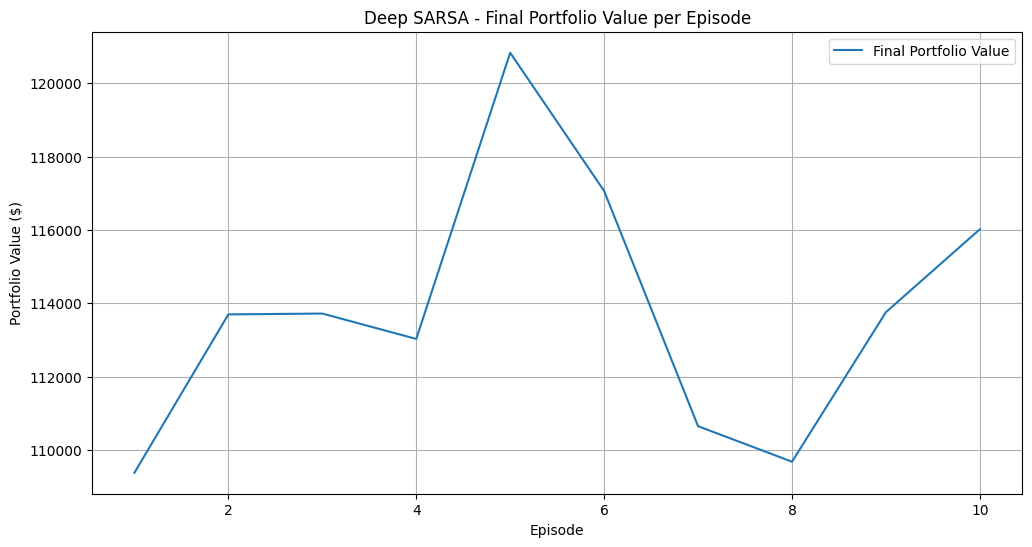

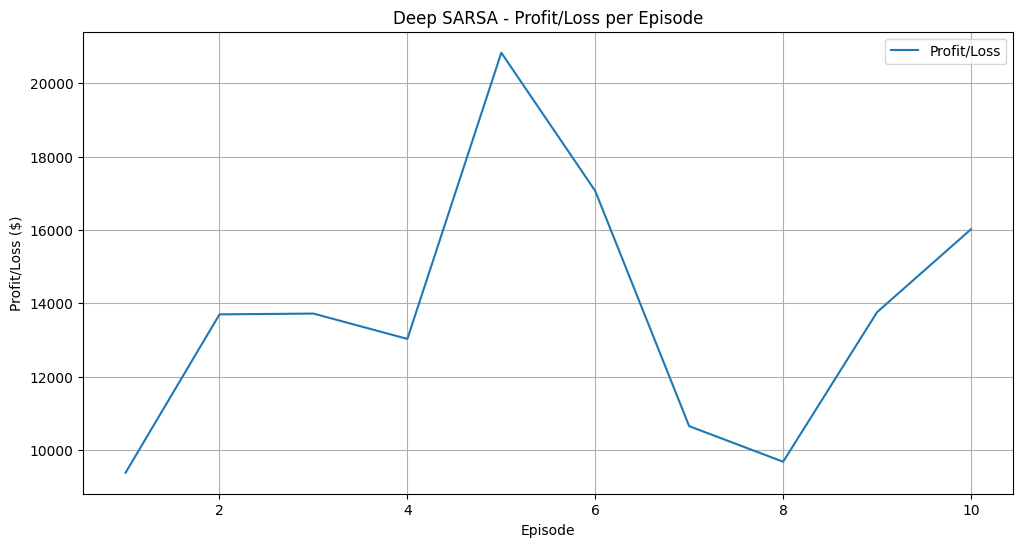

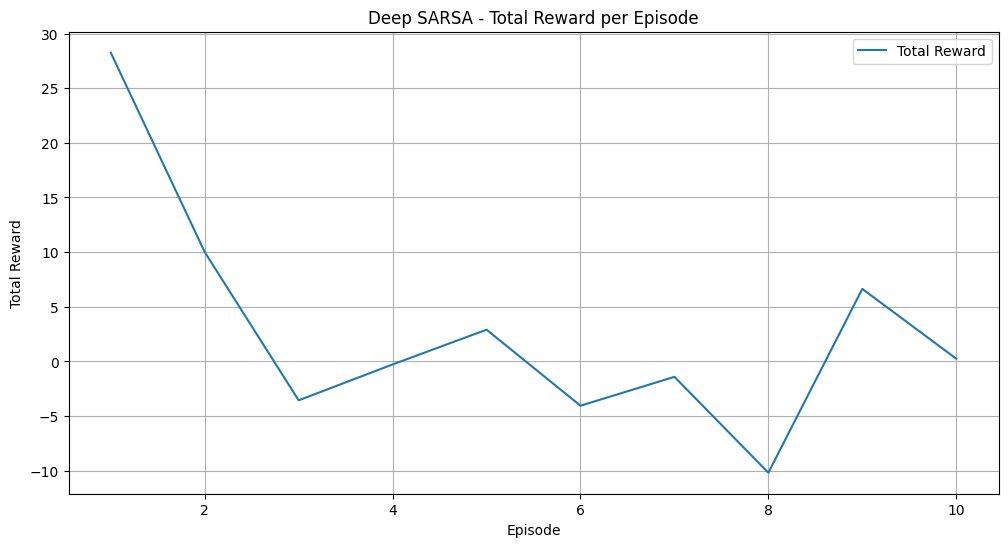

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load Evaluation Results
eval_df = pd.read_csv("DeepSARSA_evaluation_results.csv")

#Plot Final Portfolio Value per Episode
plt.figure(figsize=(12, 6))
sns.lineplot(data=eval_df, x="Episode", y="Final Portfolio Value", label="Final Portfolio Value")
plt.title("Deep SARSA - Final Portfolio Value per Episode")
plt.xlabel("Episode")
plt.ylabel("Portfolio Value ($)")
plt.grid()
plt.show()

#Plot Profit/Loss per Episode
plt.figure(figsize=(12, 6))
sns.lineplot(data=eval_df, x="Episode", y="Profit/Loss", label="Profit/Loss")
plt.title("Deep SARSA - Profit/Loss per Episode")
plt.xlabel("Episode")
plt.ylabel("Profit/Loss ($)")
plt.grid()
plt.show()

#Plot Total Reward per Episode
plt.figure(figsize=(12, 6))
sns.lineplot(data=eval_df, x="Episode", y="Total Reward", label="Total Reward")
plt.title("Deep SARSA - Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid()
plt.show()
